In [ ]:
from math import sqrt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## read csv

In [3]:
train = pd.read_csv('/Users/peter/Documents/Machine_Learning/train.csv', header = 0)

In [4]:
train1 = pd.read_csv('/Users/peter/Documents/Machine_Learning/train.csv', header = 0)

In [5]:
test = pd.read_csv('/Users/peter/Documents/Machine_Learning/test.csv', header = 0)

## check dataframe basics

### head(), shape, dtypes, columns

In [8]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [9]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [10]:
train.shape

(1460, 81)

In [8]:
#pd.set_option('display.max_rows', None)
#train.dtypes

In [ ]:
train.columns[0]

## Figure

### 1. Barplot

In [ ]:
plt.figure(figsize=(24, 18))
ax = sns.barplot(x="tfidf", y="feature", data=bi_sentry_safe_bad, color = 'red', alpha = 0.7)
ax.xaxis.label.set_size(44)
ax.yaxis.label.set_size(44)
plt.tick_params(axis='both', labelsize=48)
plt.ylabel('Key Descriptor')
plt.xlabel('Frequency')
#plt.xticks(rotation=45)
plt.title('Company A Key Descriptors in Negative Customer Reviews', fontsize=36, weight='bold')
plt.savefig('Company_A_Key_Descriptors_in_Negative_customer_reviews_9'+'.png', bbox_inches='tight', dpi=500)

### 2. Histogram

In [ ]:
ax = sns.distplot(train['SalePrice'] , fit=norm, hist_kws={'alpha': 0.5})
plt.legend(['Normal distribution'],
            loc='best', fontsize=16)

### 3. Boxplot 

In [ ]:
ax = sns.boxplot(x='Neighborhood', y="SalePrice", data=train, order = neighborhood_sorted)

In [ ]:
plt.figure(figsize = (10,4))
sns.boxplot(x = "month", y = "count", data = train_EDA.groupby(['year','month','day']).agg({'count': 'sum'}).reset_index())
plt.title('Boxplot - quartiles of count')

### 4. Scatterplot

In [ ]:
ax = sns.regplot(x="OverallQual", y="SalePrice", data=train)

### 5. Lineplot

In [ ]:
sns.lineplot(x='date_trunc2', y='switch_count', data = profile_swtich_groupby, hue='user_agent')
plt.legend(loc = 'upper left', bbox_to_anchor=(1.04, 1.04))

### 6. Regression model plot

In [ ]:
ax = sns.lmplot(x="cookie", y="percent_captcha", hue = 'case', data=df_15_test)

## check prediction normal distribution

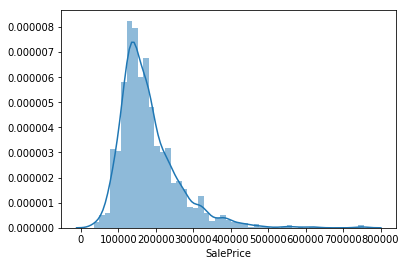

In [9]:
sns.distplot(train['SalePrice'], kde = True, hist_kws={'alpha': 0.5})

In [19]:
#train.loc[row, column]

In [13]:
list_obj = list(train.loc[:, (train.dtypes != 'float64') & (train.dtypes != 'int64')])

In [11]:
list_num = list(train.loc[:, (train.dtypes == 'float64') | (train.dtypes == 'int64')])

In [12]:
# category_num = list(train.select_dtypes(include = ['float64', 'int64']).columns.values)

In [15]:
# list(train)
# pd.set_option('display.max_rows', None)
# plt.figure(figsize=(20, 20))
# for i in list_obj:
#     fig, ax = plt.subplots(squeeze=False, sharey=True)
#     sns.set(rc={'figure.figsize':(8,8)})
#     sns.boxplot(x=i, y="SalePrice", data=train)
#     plt.xticks(rotation=45)

In [14]:
# plt.figure(figsize=(40,200))
# for i in range(len(list_num[1:-1])):
#     plt.subplot(20, 2, i+1)
#     ax = sns.regplot(x=list_num[1:-1][i], y="SalePrice", data=train)
#     plt.tick_params(axis='x', labelsize=50)
#     plt.tight_layout()
#     ax.xaxis.label.set_size(50)

### Heatmap

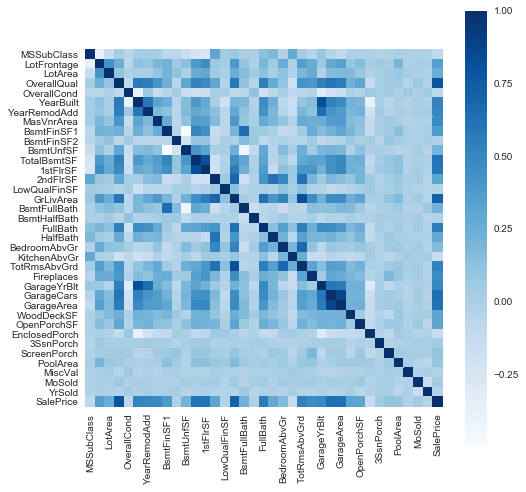

In [15]:
corr_num = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_num, vmax=1, square=True, cmap = "Blues")

In [ ]:
corrmap_new = train_corr.corr()
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmap_new, cmap="YlGnBu", annot = True)
plt.show()

### Plot multiple plots together

In [ ]:
fig = plt.figure(figsize = (16,10))

plt.subplot(2,2,1)
train.groupby('month')['count'].sum().plot(kind = 'bar')
plt.title('Sum of bike rental per month')

plt.subplot(2,2,2)
train.groupby(['season'])['count'].sum().plot(kind = 'bar')
plt.title('Sum of bike rental per season')

plt.subplot(2,2,3)
train.groupby(['season','month'])['count'].sum().plot(kind = 'bar')
plt.title('Sum of bike rental per season&month')

plt.subplot(2,2,4)
sns.boxplot(x = "month", y = "count", data = train).set(title = 'Boxplot - quartiles of Count of Bike Rental')
plt.show()

### Define a plot function

In [ ]:
def plot(data, geo, start_date, end_date):
    import warnings
    warnings.filterwarnings('ignore')
    from matplotlib import pyplot as plt
    %matplotlib inline
    data_geo = data[data['ref_geo_alpha2'] == geo]
    data_geo['date'] = data_geo['time_downloaded'].apply(lambda x: str(x.year) + 
                                                 '-' + str(x.month) +
                                                '-' + str(x.day))
    data_geo['date'] = pd.to_datetime(data_geo['date'])
    data_geo = data_geo[(data_geo['date'] > start_date) & (data_geo['date'] < end_date)]
    data_geo = data_geo.groupby(['ref_value', 'date']).count().reset_index()
    data_geo['date'] = data_geo['date'].astype(str)
    fig, ax = plt.subplots()
    ax = sns.boxplot(x = "date", y = "asin", data = data_geo)
    fig.set_size_inches(11.7, 8.27)
    ax.set_ylabel('Results per page')
    ax.set_xlabel('')
    ax.xaxis.label.set_size(40)
    ax.yaxis.label.set_size(40)
    ax.tick_params(axis='y', labelsize = 36)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=36)
    return ax

In [ ]:
def find_p_q(ts1):
    lag_acf=acf(ts1,nlags=20)
    lag_pacf=pacf(ts1,nlags=20,method='ols')
    plt.subplot(121)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts1)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts1)),linestyle='--',color='blue')
    plt.title('PACF')
    
    plt.subplot(122)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts1)),linestyle='--',color='red')
    plt.axhline(y=1.96/np.sqrt(len(ts1)),linestyle='--',color='blue')
    plt.title('ACF')
    plt.show()

### change the size and position of legend

In [ ]:
plt.legend(loc=1, prop={'size': 20}) # loc for position, size for legend size

In [ ]:
plt.legend(loc = 'upper left', bbox_to_anchor=(1.04, 1.04))

## Drop multicolinearity columns

In [ ]:
# df.drop(col, axis=1, inplace=True)

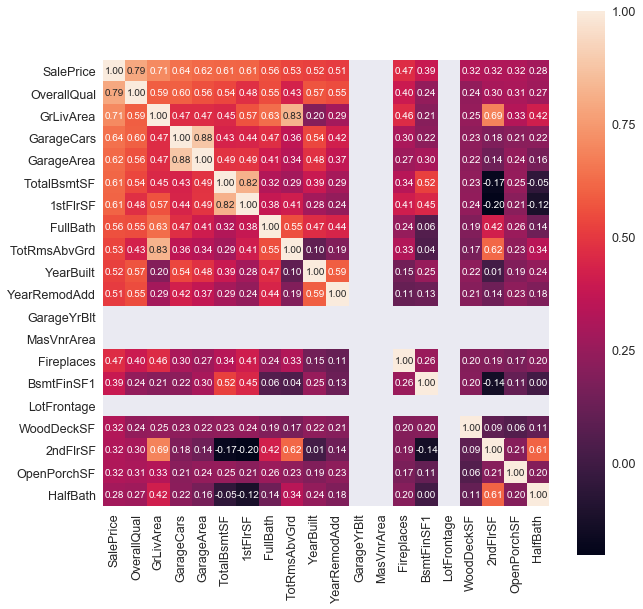

In [16]:
cols = corr_num.nlargest(20, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [81]:
# corr_obj = train.select_dtypes(exclude = ['float64', 'int64']).iloc[:, 1:].corr()
# plt.figure(figsize=(8, 8))
# sns.heatmap(corr_obj, vmax=1, square=True)

In [6]:
train_test = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

## Find out the missing columns

In [22]:
count = train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])

In [23]:
missing_data.loc[missing_data.Count > 0, :]

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


## Fill Na (Imputation)

In [47]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'MasVnrType'):
    train_test[col] = train_test[col].fillna('None')

In [48]:
for col in ('GarageArea', 'GarageCars', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test[col] = train_test[col].fillna(0)

In [24]:
# train_test.PoolQC = train_test.PoolQC.fillna("None")
# train_test.MiscFeature = train_test.MiscFeature.fillna("None")
# train_test.Alley = train_test.Alley.fillna("None")
# train_test.Fence = train_test.Fence.fillna("None")
# train_test.FireplaceQu = train_test.FireplaceQu.fillna("None")

In [ ]:
house_train = house_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'MasVnrType'):
    train_test[col] = train_test[col].fillna('None')

### Escape single quote in sql

In [ ]:
# Single quotes are escaped by doubling them up
check_data = """SELECT *
                   FROM sephora.category_page_raw
                   JOIN (SELECT id FROM sephora.category_page WHERE is_active = True AND is_terminated = False) a on a.id = category_page_raw.ref_id
                   JOIN (SELECT category_page_id, ref_resource_group_id FROM sephora.category_page_to_ref_resource_group) b on b.category_page_id = category_page_raw.ref_id
                   JOIN (SELECT id, name FROM ref.resource_group WHERE is_terminated = False) c ON c.id = b.ref_resource_group_id
                   WHERE name = 'L''Oreal Hypercare 2018'
                   """
check_data = pd.read_sql(check_data, p_prod)

### Subset data without certain size or subset data with certain size

In [ ]:
cmp_df2[:-prediction_size]

In [ ]:
cmp_df2[-prediction_size:]

### get the sum of a column or a row

In [ ]:
check_data_subset_percentage['percentage'] = check_data_subset_percentage['rank']/check_data_subset_percentage['rank'].sum()*100

In [ ]:
sum_row = dft1.sum(axis=0)

In [ ]:
check_data_subset_percentage['Total'] = check_data_subset_percentage.sum(axis=1)

### Remove duplicated columns

In [ ]:
df = df.loc[:,~df.columns.duplicated()]

### Get the column using index

In [ ]:
df[df.columns[2]]

### get the sum of certain columns not all of them

In [344]:
col_list = list(GB_csv)

In [345]:
col_list.remove('PassengerId')

In [346]:
col_list

['Survived_XGB', 'Survived_LR', 'Survived_GBC', 'Survived_RF', 'Survived_SVC']

In [347]:
GB_csv['total'] = GB_csv[col_list].sum(axis = 1)

## Read data and check NA and inf

In [ ]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
df_1 = d
df_1.isnull().values.any()

In [ ]:
df_1['YearsSinceRemodel'] = df_1['YearsSinceRemodel'].fillna(0)
df_1.isnull().values.any()

In [ ]:
df_1[df_1.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
df_1.isnull().values.any()

In [ ]:
train_test.isnull().s gum().sum()

## Drop outlier

In [ ]:
sns.lmplot('GrLivArea', # Horizontal axis
           'SalePrice', # Vertical axis
           data=house_train, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "alpha": 1,
                        "s": 1}) # S marker size

In [ ]:
house_train = house_train.drop(house_train[(house_train.GrLivArea > 4000) & (house_train['SalePrice']<300000)].index)

## isin

In [ ]:
df[df.countries.isin(countries)]

In [ ]:
df[~df.countries.isin(countries)]

## check if a cell contains a string

In [ ]:
df[df['A'].str.contains("hello")]

### quick way to subset rows or columns

In [ ]:
a = full_new['Physician_Primary_Type'] # column

In [ ]:
a = full_new[0:1] # row

### merge and concat multiple dataframes

In [ ]:
from functools import reduce

In [ ]:
df_final = reduce(lambda left,right: pd.merge(left,right,how = 'outer',on='brand'), dfs)

In [ ]:
df_final1 = reduce(lambda left,right: pd.concat([left,right],axis=0), dfs)

### join different column names

In [ ]:
rank_group_merge = pd.merge(rank_data, group_data, 
                            how = 'inner', 
                            left_on = 'ref_id', 
                            right_on = 'keyword_id')

### join on multiple columns

In [ ]:
rank_compare = pd.merge(rank_data, rank_data1, 
                        how = 'inner', 
                        on = ['ref_id', 'ref_geo_alpha2', 'ref_resource_group_id', 'name'])

### append new dataframe

In [ ]:
fig = plt.figure(1, figsize=(21, 5 * 6), dpi=80, facecolor='w', edgecolor='k')
for i in range(0, 10):
    ax = fig.add_subplot(5, 2, i + 1)
    sns.boxplot(x = "Cover_Type", y = columns_to_draw[i], data = train_EDA)

In [ ]:
may_2017=pd.DataFrame(columns=['datetime','count'])
for i in range(1,32):
    for j in range(24):
        day=str(i) if i >=10 else '0'+str(i)
        hour=str(j) if j >=10 else '0'+str(j)
        strdate='2017-05-'+day+' '+hour+':00:00'
        countnum=hourlypart[j]*may_2017_date[i-1]
        tmp=pd.DataFrame([[strdate,countnum]],columns=['datetime','count'])
        may_2017=may_2017.append(tmp)

# Data cleaning

In [ ]:
def data_clean(data_frame_path):
    reviews = jsonreader(data_frame_path)
    reviews.drop('error', axis = 1, inplace = True)
    reviews['date'] = reviews['date'].astype('str')
    reviews['date'] = reviews['date'].apply(lambda x: x[3:])
    reviews= reviews.astype(str)
    reviews = reviews[reviews['name'] != 'nan']
    reviews = reviews[reviews['date'] != '']
    reviews['date'] = reviews['date'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
    reviews['rating'] = reviews['rating'].apply(lambda x: re.findall("\d+\.\d+", x))
    reviews['rating'] = reviews['rating'].apply(lambda x: x[0])
    reviews['price'] = reviews['price'].str.replace('$', '')
    reviews['price'] = reviews['price'].apply(lambda x: re.findall("\d+\.\d+", x))
    reviews['price'] = reviews['price'].apply(lambda x: x[0])
    reviews['price'] = pd.to_numeric(reviews['price'])
    reviews['rating'] = pd.to_numeric(reviews['rating'])
    reviews = reviews.drop_duplicates()
    print(reviews.shape)
    return reviews

In [ ]:
reviews_sentry_safe_joined = reviews_sentry_safe.groupby(['name']).agg({'review': lambda x: ' '.join(map(str,x))}).reset_index()

In [ ]:
sentrysafe_1 = reviews_sentry_safe[reviews_sentry_safe['name'].str.slice(0,10) == 'SentrySafe']

In [ ]:
reviews_amazon = reviews_amazon[reviews_amazon['name'].str.find('Amazon') != -1]

## Convert ordinal to numeric

In [29]:
qual_dict = {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5,
            0:0, 1:1, 2:2, 3:3, 4:4, 5:5}
house_train_d["ExterQual"] = house_train["ExterQual"].map(qual_dict).astype(int)
house_train["ExterCond"] = house_train["ExterCond"].map(qual_dict).astype(int)
house_train["BsmtQual"] = house_train["BsmtQual"].map(qual_dict).astype(int)
house_train["BsmtCond"] = house_train["cdBsmtCond"].map(qual_dict).astype(int)
house_train["HeatingQC"] = house_train["HeatingQC"].map(qual_dict).astype(int)
house_train["KitchenQual"] = house_train["KitchenQual"].map(qual_dict).astype(int)
house_train["FireplaceQu"] = house_train["FireplaceQu"].map(qual_dict).astype(int)
house_train["GarageQual"] = house_train["GarageQual"].map(qual_dict).astype(int)
house_train["GarageCond"] = house_train["GarageCond"].map(qual_dict).astype(int)

In [26]:
house_train_d["ExterQual_test"] = house_train_d["ExterQual"].map(qual_dict).astype(int)

In [28]:
# house_train_d["ExterQual_test"]

In [31]:
neighborhood_sf = pd.DataFrame({'neightborhood': ['good', 'medium', 'bad'], 'score' : [3,2,1] })

## Skewness

In [ ]:
from scipy.stats import norm, skew
numeric_feats = house_train_test_log.dtypes[house_train_test_log.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = house_train_test_log[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
house_train_test_log[skewed_features] = np.log1p(house_train_test_log[skewed_features])

### Skewness of prediction

In [90]:
y = np.log1p(y)

In [ ]:
house_train_d["SalePrice"] = np.log1p(house_train_d["SalePrice"])

### set a column to index

In [ ]:
df_top5_temp1.loc[0:10,['Physician_Specialty', 'percentage']].set_index(['Physician_Specialty'])

### agg : count

In [ ]:
df_top5_temp1.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name']).agg({'Physician_Specialty':'count'})

### Use np.where

In [47]:
neighborhood_sf["binary_response"] = np.where(neighborhood_sf["neightborhood"] == "good", 'y', 'n')

In [ ]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [59]:
neighborhood_sf['response'] = neighborhood_sf['neightborhood'].map(new_dict).astype(int)

In [60]:
neighborhood_sf

,neightborhood,score,binary_response,response
0,good,3,y,4
1,medium,2,n,2
2,bad,1,n,1


### isin

In [ ]:
df[df['countries']isin(countries)] # the latter countries is a list
df[~df['countries']isin(countries)] # not in

### change column type

In [ ]:
count['count'] = count['count'].astype('int')

### split text in a column into multiple rows (explode)

In [ ]:
s = CBL['certification'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'certification'
del CBL['certification']
CBL.join(s)

### Find difference between two data frames

In [ ]:
pd.concat([df1,df2]).drop_duplicates(keep=False)

### check null and sort and drop duplicate based on certain column

In [ ]:
parking[parking.isnull().any(axis = 1) == False].sort_values(by = ['Start Date']).drop_duplicates(subset = ['DCA License Number'], keep = 'last').shape

### Ways of selecting multiple columns

In [ ]:
df1 = df[['a','b']]

In [ ]:
df1 = df.iloc[:,0:2]

Additionally, you should familiarize yourself with the idea of a view into a Pandas object vs. a copy of that object. The first of the above methods will return a new copy in memory of the desired sub-object (the desired slices).

Sometimes, however, there are indexing conventions in Pandas that don't do this and instead give you a new variable that just refers to the same chunk of memory as the sub-object or slice in the original object. This will happen with the second way of indexing, so you can modify it with the copy() function to get a regular copy. When this happens, changing what you think is the sliced object can sometimes alter the original object. Always good to be on the look out for this.

In [ ]:
df1 = df.iloc[0,0:2].copy()

### Convert 'datetime' column's type to 'datetime'

In [ ]:
train_test['datetime'] = pd.to_datetime(train_test['datetime'],format='%Y-%m-%d %H:%M:%S')

### Break down datetime

In [ ]:
train_test['year'] = train_test['datetime'].dt.year
train_test['month'] = train_test['datetime'].dt.month
train_test['day'] = train_test['datetime'].dt.day
train_test['weekday'] = train_test['datetime'].dt.weekday # Create a new column showing weekday
train_test['hour'] = train_test['datetime'].dt.hour

### How to convert separate columns to one date

In [ ]:
m = dict(Y='year', M='month', D='day', h='hour', m='minute', s='second')
v = df.iloc[:, :6].rename(columns=m)
pd.to_datetime(v)

### Convert timedelta to integer

In [ ]:
(test_date['date_trunc2'].max()-test_date['date_trunc2'].min())/timedelta (days=1)

### Convert datetime to ordinal and get whether the dates are consecutive

In [ ]:
test_date['date_trunc2'] = \
test_date['date_trunc2'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

In [ ]:
(test_date['date_trunc2'].max()-test_date['date_trunc2'].min()) == test_date.shape[0] - 1

### Change the order columns in a dataframe

In [ ]:
df = df[cols]

### Save dataframe as a tsv

In [2]:
csv_name = 'training_data2.csv'
training_data_copy2.to_csv(csv_name, sep='\t', index=False)
s3r = boto3.resource('s3')
s3r.meta.client.upload_file(csv_name,
                            'training-data-qa',
                            'bestbuy/training_data2.csv',
                            ExtraArgs={'ContentType': 'text/csv'})
os.remove(csv_name)

### Groupby and count on conditions

In [ ]:
scrape_info[(scrape_info['cookie'] != '') &
            (scrape_info['csm-hit'] != '') &
            (scrape_info['session-id-time'] != '') &
            (scrape_info['session-id'] != '')].groupby(['date', 'hour']).size().reset_index(name='count')

### Groupby and size

In [ ]:
total = scrape_info.groupby(['date', 'hour']).h

### Convert zipped lists to dictionary

In [ ]:
dict(zip(c, d))

### Create new columns based on the values from other columns

In [ ]:
train_test.loc[train_test['weekday'] < 6, 'weekend'] = 0
train_test.loc[train_test['weekday'] >= 6 , 'weekend'] = 1

In [ ]:
df_no_null.loc[(df_no_null['Zip'] >= 10001) & (df_no_null['Zip']<=10280), 'bbb'] = 'MANHATTAN'
df_no_null.loc[(df_no_null['Zip'] >= 10301) & (df_no_null['Zip']<=10314), 'bbb'] = 'MANHATTAN'
df_no_null.loc[(df_no_null['Zip'] >= 10451) & (df_no_null['Zip']<=10475), 'bbb'] = 'MANHATTAN'
df_no_null.loc[((df_no_null['Zip'] >= 11004) & (df_no_null['Zip']<=11006)) | ((df_no_null['Zip']>= 11354) & (df_no_null['Zip']<=11697)), 'bbb'] = 'MANHATTAN'
df_no_null.loc[(df_no_null['Zip'] >= 11201) & (df_no_null['Zip']<=11239), 'bbb'] = 'MANHATTAN'

### Convert dataframe to dictionary

In [49]:
new_dict = neighborhood_sf.set_index('neightborhood')['score'].to_dict()

In [158]:
age_to_title = train_test.groupby(['Title']).agg({'Age': 'median'}).reset_index().set_index('Title').T.to_dict('record')[0]

In [57]:
new_dict['good'] = new_dict['good']+1

In [81]:
new_dict

{'bad': 1, 'good': [4], 'medium': 2}

In [78]:
d1 = {}
d1.setdefault('key', []).append(1)

In [ ]:
inventory['vegetable'] = sorted(inventory['vegetable'])

## Scale train dataset and test dataset

In [ ]:
from sklearn.preprocessing import StandardScaler ##scaling the predictors
scaler = StandardScaler().fit(house_train_1)
X1_scale = pd.DataFrame(scaler.transform(house_train_1), index=house_train_1.index.values, columns=house_train_1.columns.values)
check_scale = pd.DataFrame(scaler.transform(check2), index=check2.index.values, columns=check2.columns.values)

### Replace using dictionary

In [ ]:
house_train["BoughtOffPlan"] = house_train.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

### get distinct column values

In [ ]:
list(set(df_top5_temp1['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].values))

### List of column names

In [ ]:
cols = house_train_d.columns.tolist()

In [ ]:
names = list(house_test.columns.values)

### write csv

In [ ]:
reviews_amazon.to_csv('amazonbasics_reviews.csv')

## Change value
### After combine train and test, reset_index(), second thought not combine

In [49]:
pd.set_option('display.max_columns', None)
#train_test.Garage = [2007 if x ==2207 for x in garage, else x]
train_test.loc[train_test.GarageYrBlt == 2207, 'GarageYrBlt'] = 2007 #########

In [59]:
train_test['RemodAdd'] = train_test.YearRemodAdd - train_test.YearBuilt
train_test[train_test['RemodAdd'] <0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,RemodAdd
416,20,RL,65.0,10739,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,None,None,None,0,4,2009,WD,Normal,-1


In [24]:
#train_test.loc[train_test['GarageCars'].isnull(), :]
train_test = train_test.reset_index()

### Use lambda with if else

In [ ]:
processed_ref_data_lite['user_agent'] = processed_ref_data_lite['headers'].apply(lambda x: ast.literal_eval(x) if x != None else None)

### List comprehension if else

In [25]:
train_test['GarageBlt'] = [0 if train_test.loc[i, 'GarageYrBlt'] == 'NaN'
                           else train_test.loc[i, 'GarageYrBlt'] - train_test.loc[i,'YearBuilt'] for i in range(len(train_test['GarageYrBlt']))]

### List comprehension elif

In [ ]:
train['Wilderness_Area'] = ['Wilderness_Area1' if train.loc[i, 'Wilderness_Area1'] == 1 else 'Wilderness_Area2' if train.loc[i, 'Wilderness_Area2'] == 1 
                           else 'Wilderness_Area3' for i in range(len(train['Wilderness_Area1']))]

In [9]:
house_train_d = pd.read_csv('/Users/peter/Documents/Machine_Learning/train_dummies.csv', header = 0, index_col=0)

In [10]:
house_test_d =pd.read_csv('/Users/peter/Documents/Machine_Learning/test_dummies.csv', header = 0, index_col=0)

In [82]:
house_train_d['1stFlrSF'].value_counts()

In [12]:
house_train_d['SalePrice'].var()

5882367305.720001

### Rename of columns

In [76]:
# Fixing some column names:
house_train_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                             "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                             "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                             "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_test_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                              "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                              "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                              "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_train_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)
house_test_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)

### Basic data exploration

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.season.value_counts()
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

In [ ]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

## Getting Dummies

In [ ]:
train = pd.get_dummies(train, prefix = ['MSSubClass'])

In [ ]:
train_test_dummy = pd.get_dummies(train_test, drop_first = True)

In [ ]:
full_df_dummies  = pd.get_dummies(full_df)

### Get X and y

In [15]:
train = house_train_d.ix[:,0:265]
target = house_train_d.ix[:,265]

In [83]:
X = house_train.loc[:, house_train.columns != 'SalePrice']
y = house_train.SalePrice

In [78]:
X = house_train_d.ix[:,0:265].values
y = house_train_d.ix[:,265].values

## 5. Modeling

### 5.1 Ridge regression

For selecting test dataset, instead of using train_test_split, I split 2017-04 from the rest of the train dataset and used it as test dataset. 

In [132]:
y = count
X = train_dummy

#Split the data into training data and test data
X_train = X[:10944]
X_test = X[10944:]
y_train = y[:10944]
y_test = y[10944:]

If you want to use train_test_split, the following code shows how.

In [ ]:
from sklearn.model_selection import train_test_split

y = totalCount
X = traindummy

#Split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [133]:
from sklearn.linear_model import RidgeCV
from sklearn import metrics

ridgeCV = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10], scoring = 'neg_mean_squared_error', normalize = True, cv = 5)
ridgeCV.fit(X_train, y_train)

print('Test data score     : ',ridgeCV.score(X_test, y_test))
print('Training data score : ',ridgeCV.score(X_train, y_train))

Test data score     :  0.894419584575101
Training data score :  0.9001632779218138


In [134]:
# Because in the original dataset, the type of 'count' column is integer, I guessed it is order number. 
# Therefore, I think it would be reasonable to convert the predictions and test values to integers and find the mean squred error.
from sklearn.metrics import mean_squared_error
pred_ridge = ridgeCV.predict(X_test)
pred_ridge = np.exp(pred_ridge)-1
y_test = np.exp(y_test) -1
pred_ridge = pred_ridge.astype('int')
y_test = y_test.astype('int')
print(mean_squared_error(y_test, pred_ridge))

103.94074710176041


### 5.2 Lasso regression

In [167]:
y = count
X = train_dummy

#Split the data into training data and test data
X_train = X[:10944]
X_test = X[10944:]
y_train = y[:10944]
y_test = y[10944:]

In [168]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(alphas = [0.001, 0.01, 0.1, 1, 10], normalize = True, cv = 5)
lassoCV.fit(X_train, y_train)

print('Test data score     : ',lassoCV.score(X_test, y_test))
print('Training data score : ',lassoCV.score(X_train, y_train))

Test data score     :  0.7414026312106321
Training data score :  0.7777153944313899


In [169]:
# Because in the original dataset, the type of 'count' column is integer, I guessed it is order number. 
# Therefore, I think it would be reasonable to convert the predictions and test values to integers and find the mean squred error.
pred_lasso = lassoCV.predict(X_test)
pred_lasso = np.exp(pred_lasso)-1
y_test = np.exp(y_test) -1
pred_lasso = pred_lasso.astype('int')
y_test = y_test.astype('int')
print(mean_squared_error(y_test, pred_lasso))

453.7173601147776


### 5.3 Random Forest

In [154]:
y = count
X = train_dummy

#Split the data into training data and test data
X_train = X[:10944]
X_test = X[10944:]
y_train = y[:10944]
y_test = y[10944:]

In [162]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(X_train, y_train)
print('Test data score     : ', randomForest.score(X_test, y_test))
print('Training data score : ', randomForest.score(X_train, y_train))

Test data score     :  0.892578347462346
Training data score :  0.981379825975982


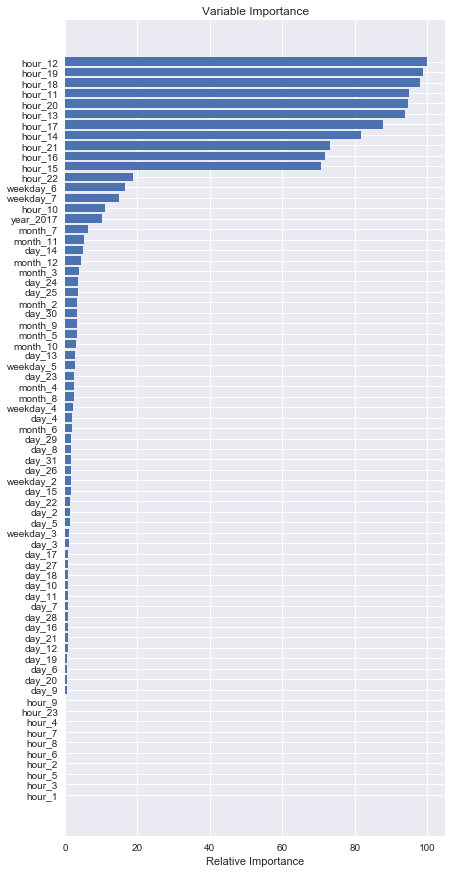

In [163]:
feature_importance = randomForest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [138]:
# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [100, 200, 300, 400, 500],
    "min_samples_leaf": range(1, 3),
    "min_samples_split": np.linspace(start=2, stop=30, num=3, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1, verbose=1)
%time grid_search_forest.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.4min finished


CPU times: user 5.24 s, sys: 424 ms, total: 5.67 s
Wall time: 10min 25s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [100, 200, 300, 400, 500], 'min_samples_leaf': range(1, 3), 'min_samples_split': array([ 2, 16, 30]), 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [158]:
print(grid_search_forest.best_params_)

{'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 100, 'random_state': 42}


In [156]:
print('Test data score     : ', grid_search_forest.score(X_test, y_test))
print('Training data score : ', grid_search_forest.score(X_train, y_train))

Test data score     :  0.9626588964583875
Training data score :  0.9415232463234281


In [157]:
# Because in the original dataset, the type of 'count' column is integer, I guessed it is order number. 
# Therefore, I think it would be reasonable to convert the predictions and test values to integers and find the mean squred error.
pred_RF = grid_search_forest.predict(X_test)
pred_RF = np.exp(pred_RF)-1
y_test = np.exp(y_test) -1
pred_RF = pred_RF.astype('int')
y_test = y_test.astype('int')
print(mean_squared_error(y_test, pred_RF))

59.12338593974175


### 5.4 Gradient Boosting Regression

In [171]:
y = count
X = train_dummy

#Split the data into training data and test data
X_train = X[:10944]
X_test = X[10944:]
y_train = y[:10944]
y_test = y[10944:]

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1,
      random_state = 42,).fit(X_train, y_train)

print('Test data score     : ', est.score(X_test, y_test))
print('Training data score : ', est.score(X_train, y_train))

Test data score     :  0.9534991829553987
Training data score :  0.9476668404502104


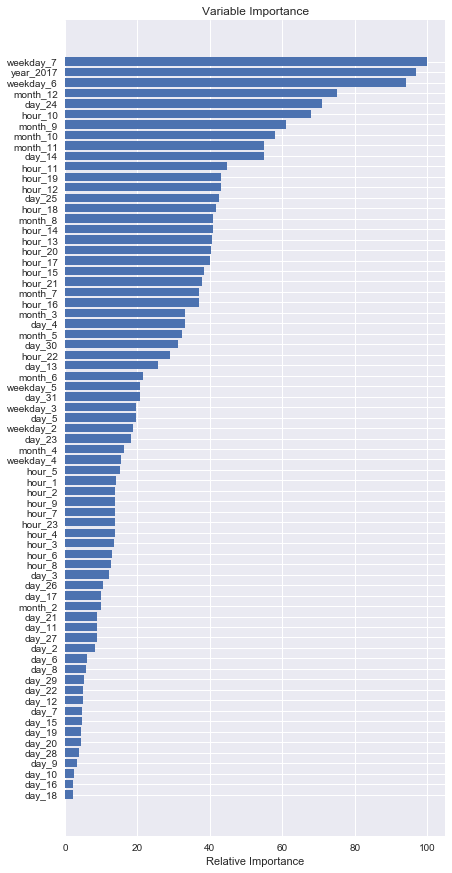

In [161]:
feature_importance = est.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [164]:
# Use GridSearchCV to find the best parameters
grid_para_boosting = [{
    "n_estimators":[600,700,800,900,1000],
    "learning_rate" :[0.01, 0.1, 0.2, 0.3],
    "max_depth": [1,2,3,4], 
    "random_state": [42]}]
grid_search_boosting = GridSearchCV(est, grid_para_boosting, cv=5, n_jobs=-1, verbose=1)
%time grid_search_boosting.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 22.0min finished


CPU times: user 8.03 s, sys: 887 ms, total: 8.92 s
Wall time: 22min 3s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [600, 700, 800, 900, 1000], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [1, 2, 3, 4], 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1]:
print(grid_search_boosting.best_params_)

NameError: name 'grid_search_boosting' is not defined

In [173]:
# Because in the original dataset, the type of 'count' column is integer, I guessed it is order number. 
# Therefore, I think it would be reasonable to convert the predictions and test values to integers and find the mean squred error.
pred_GB = grid_search_boosting.predict(X_test)
pred_GB = np.exp(pred_GB)-1
y_test = np.exp(y_test) -1
pred_GB = pred_GB.astype('int')
y_test = y_test.astype('int')
print(mean_squared_error(y_test, pred_GB))

247.2697274031564


## 6. Hourly prediction for the month of May 2017

Since Random Forest gave the best score, I used Random Forest to predict on test dataset.

In [175]:
randomForest = RandomForestRegressor()
randomForest.set_params(oob_score=True, random_state=42, min_samples_leaf = 2, 
                        min_samples_split = 30, n_estimators = 100)
y = count
X = train_dummy
randomForest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=30,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [182]:
predAll_RF = randomForest.predict(test_dummy)
count_exp = np.exp(predAll_RF)-1
count_exp = count_exp.astype('int')
RF_csv = test[['datetime']]
RF_csv['count'] = count_exp

The values from column 'count' in 'Revmax-skill-accessment-data.csv' are all intergers. Therefore, I furthered converted prediction results to intergers.

# Modeling

## Split dataset

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.model_selection import GridSearchCV

### Function to calculate rmsle between y_test and y_pred

In [114]:
def rmsle(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   #return np.square(y_pred - y_true).mean() ** 0.5
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

log_error = rmsle(y_test, y_pred)
print(log_error)

0.137748332754


## Model 1. Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
param_grid = {
                'n_estimators': [50, 100, 200,500],
                'max_depth': [5, 10, 20, 50]
             }
clf = RandomForestRegressor(random_state=42)

In [94]:
grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose = 10)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, n_estimators=500 ..................................
[CV]  max_depth=50, n_estimators=500, score=-0.017527461901699067, total=  10.7s
[CV] max_depth=50, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  max_depth=50, n_estimators=500, score=-0.020991128535195358, total=  11.0s
[CV] max_depth=50, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.8s remaining:    0.0s


[CV]  max_depth=50, n_estimators=500, score=-0.02563707375909819, total=  10.7s
[CV] max_depth=50, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.6s remaining:    0.0s


[CV]  max_depth=50, n_estimators=500, score=-0.018328460284011305, total=  10.7s
[CV] max_depth=50, n_estimators=500 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   43.4s remaining:    0.0s


[CV]  max_depth=50, n_estimators=500, score=-0.013399881030673865, total=  10.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_depth': [50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=10)

In [97]:
grid_clf.best_params_

{'max_depth': 50, 'n_estimators': 500}

In [98]:
sqrt(-grid_clf.best_score_)

0.1384982458079801

In [99]:
best_rf = grid_clf.best_estimator_

In [100]:
best_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
y_pred = best_rf.predict(X_test)

In [102]:
np.square(y_pred - y_test).mean() ** 0.5

0.1406233262072328

## Model 2. Ridge

In [106]:
from sklearn.linear_model import Ridge

In [107]:
param_grid = {
                 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             }
clf = Ridge()

In [115]:
#grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose = 2)
#grid_clf.fit(X_train, y_train)

In [111]:
grid_clf.best_params_

{'alpha': 100}

In [112]:
sqrt(-grid_clf.best_score_)

0.11560013996306281

In [113]:
best_ri = grid_clf.best_estimator_

In [114]:
best_ri

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
y_pred = best_ri.predict(X_test)

In [117]:
np.square(y_pred - y_test).mean() ** 0.5

0.12248674373166579

## Model 3. Lasso

In [118]:
from sklearn.linear_model import Lasso

In [119]:
param_grid = {
                 'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
             }
clf = Lasso()

In [120]:
grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring = 'neg_mean_squared_error', verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.4s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s



[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.1s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=   0.2s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [121]:
grid_clf.best_params_

{'alpha': 0.001}

In [126]:
sqrt(-grid_clf.best_score_)

0.11275583996500443

In [122]:
best_la = grid_clf.best_estimator_

In [123]:
best_la

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
y_pred = best_la.predict(X_test)

In [130]:
np.square(y_pred - y_test).mean() ** 0.5

0.11978628979649866

## Model 4. SVR

In [1]:
from sklearn.svm import SVR

In [135]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = SVR()

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

In [ ]:
grid_clf.best_params_

In [ ]:
sqrt(-grid_clf.best_score_)

In [ ]:
best_svr = grid_clf.best_estimator_

In [ ]:
best_svr

In [ ]:
y_pred = best_svr.predict(X_test)

In [ ]:
np.square(y_pred - y_test).mean() ** 0.5

## Model 5. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid = {
                 'n_estimators': [100, 500, 1000],
                 'max_depth': [2, 5, 10],
    'learning_rate':[0.001, 0.01, 0.1],
    'loss':['huber']
             }
clf = GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring = 'neg_mean_squared_error', verbose = 10)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
sqrt(-grid_clf.best_score_)

In [ ]:
best_gb = grid_clf.best_estimator_

In [ ]:
best_gb

In [ ]:
y_pred = best_gb.predict(X_test)

In [ ]:
np.square(y_pred - y_test).mean() ** 0.5

## Model 6. Xgboost

In [ ]:
import xgboost as xgb

In [ ]:
param_grid = {
                 'n_estimators': [100, 500, 1000],
                 'max_depth': [2],
    'learning_rate':[0.1],
    'gamma' : [0.0001, 0.0025, 0.0005],
    'min_child_weight' : [1.2, 1.6, 2],
    'subsample' : [0.9]
    
             }
clf = xgb.XGBRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring = 'neg_mean_squared_error', verbose = 10)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
sqrt(-grid_clf.best_score_)

In [ ]:
best_xgb = grid_clf.best_estimator_

In [ ]:
best_xgb

In [ ]:
y_pred = best_xgb.predict(X_test)

In [ ]:
np.square(y_pred - y_test).mean() ** 0.5

In [105]:
regr = Lasso(alpha=.0005, max_iter=50000, tol = .0001)
regr.fit(train, target)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)

0.120594391642


In [158]:
df1 = pd.DataFrame({'Alphas':lasso_fit.alphas_, 'RMSE':np.sqrt(lasso_fit.mse_path_).mean(axis = 1)})
print('Lasso: alpha = {0} (chosen to minimize RMSE)'.format(lasso_fit.alpha_))

Lasso: alpha = 339749.1939637728 (chosen to minimize RMSE)


In [169]:
import numpy as np
alphas = np.arange(0,0.1,0.0001)
ridge_model = RidgeCV(cv=10, alphas=alphas)
ridge_fit = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)

0.155894902654


In [171]:
 print('Ridge: alpha = {0} (chosen to minimize RMSE)'.format(ridge_fit.alpha_))

Ridge: alpha = 0.0999 (chosen to minimize RMSE)


In [177]:
# from sklearn.cross_validation import KFold, cross_val_score
# from sklearn.linear_model import LassoCV
# cv_outer = KFold(len(X_train), n_folds=5)
# lasso = LassoCV(cv=3)
# scores = cross_val_score(lasso, X_train, y_train, cv=cv_outer)

In [178]:
scores

array([ 0.73570466,  0.78395043,  0.81454964,  0.72217804,  0.73463099])

In [28]:
def sub_plot(df):
    fig, ax1 = plt.subplots()
    ax1.plot(df['Alphas'], df['RMSE'], 'g-')
    ax1.set_xlabel('Alphas')
    ax1.set_ylabel('RMSE', color='g')
    plt.title('Change in RMSE wrt Alpha')
    plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import numpy as np

clf = RandomForestRegressor() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

/Users/peter/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.872704532594


In [64]:
param_grid = {
                 'n_estimators': [40, 50,60, 70],
                 'max_depth': [10, 20, 30, 40]
             }

In [78]:
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring="neg_mean_absolute_error")
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 50, 60, 70], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [119]:
ran = grid_clf.best_estimator_

In [120]:
ran.fit(X_train, y_train)
ran.score(X_train, y_train)

0.98353043999045087

In [135]:
ran_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
y_pred_1 = ran.predict(X_t)

In [123]:
y_pred_1 = ran.predict(X_train)
log_error_1 = rmsle(y_train, y_pred_1)
print(log_error_1)

0.0564823465027


In [127]:
y_pred = ran.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)
print(log_error**2)

0.142321799566
0.0202554946318


In [194]:
#ran.feature_importances_

In [80]:
grid_clf.best_params_

{'max_depth': 20, 'n_estimators': 70}

In [197]:
#grid_clf.grid_scores_

In [81]:
regr = RandomForestRegressor(n_estimators=20, max_depth=70, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

log_error = rmsle(y_test, y_pred)
print(log_error)

0.142144756004


In [82]:
regr = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

log_error = rmsle(y_test, y_pred)
print(log_error)

0.138628095518


In [ ]:
parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
                        ,"min_samples_split" :[2,3,4,5,6]
                        ,"n_estimators" : [10]
                        ,"min_samples_leaf": [1,2,3,4,5]
                        ,"max_features": (2,3,4)}
rf_regr = RandomForestRegressor()
grid_clf1 = GridSearchCV(rf_regr, parameters, cv = 10)
grid_clf1.fit(X_train,y_train)
ran_best = grid_clf1.best_estimator_


In [130]:
parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
                        ,"min_samples_split" :[2,3,4,5,6]
                        ,"n_estimators" : [10]
                        ,"min_samples_leaf": [1,2,3,4,5]
                        ,"max_features": (2,3,4)}
rf_regr = RandomForestRegressor()
grid_clf1 = GridSearchCV(rf_regr, parameters, cv = 10)
grid_clf1.fit(X_train,y_train)
learned_parameters = grid_clf1.best_params_
ran_best.feature_importances_

In [131]:
# ran_1 = RandomForestRegressor(max_depth = learned_parameters["max_depth"]
#                             ,max_features = learned_parameters['max_features']
#                             ,min_samples_leaf = learned_parameters['min_samples_leaf']
#                             ,min_samples_split = learned_parameters['min_samples_split']
#                             ,n_estimators = 500)

In [132]:
ran_best = grid_clf1.best_estimator_

In [136]:
# ran_1.fit(X_train, y_train)
# ran_1.score(X_train, y_train)
# y_pred_2 = ran_1.predict(X_test)
# log_error_2 = rmsle(y_test, y_pred_2)
# print(log_error_2)

0.180344294094


In [137]:
ran_best.fit(X_train, y_train)
ran_best.score(X_train, y_train)
y_pred_2 = ran_best.predict(X_test)
log_error_2 = rmsle(y_test, y_pred_2)
print(log_error_2)

0.175617198001


### Testing

In [370]:
a= ran_best.feature_importances_

In [297]:
b = list(a)

In [298]:
c = list(enumerate(b))

In [357]:
c = sorted(c, key=lambda e: e[1], reverse=True)

In [163]:
#c_2 = list(filter(lambda x: x[1] > 1/265, c))

In [290]:
train_colnames = list(train)

In [291]:
train_colnames = list(enumerate(train_colnames))

In [176]:
# c_list = [lambda x: list(x) for x in c]

In [359]:
c_list = []
for i in range(len(c)):
    c_list.append(list(c[i]))

In [361]:
for i in range(len(train_colnames)):
        c_list[i][0] = train_colnames[i][1]

In [185]:
c_list_select = list(filter(lambda x: x[1] > 1/265, c_list))
len(c_list_select)

50

In [253]:
c_list_150 = c_list[0:150]

In [189]:
c_list_select_name = [x[0] for x in c_list_select]

In [190]:
train_50 = train[c_list_select_name]

In [256]:
c_list_select_150 = [x[0] for x in c_list_150]
train_150 = train[c_list_select_150]

In [258]:
X1 = train_150.values 

In [261]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

### Random forest

In [262]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr1.fit(X_train1, y_train1)

y_pred1 = regr1.predict(X_test1)

log_error1 = rmsle(y_test1, y_pred1)
print(log_error1)

0.13888595053


In [315]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

log_error = rmsle(y_test, y_pred)
print(log_error)

0.139337393627


### Get important features from randomforest

In [333]:
a1 = list(regr.feature_importances_)
b1 = list(enumerate(a1))
#c1 = sorted(b1, key=lambda e: e[1], reverse=True)

In [341]:
c_list_ = []
for i in range(len(c)):
    c_list_.append(list(b1[i]))
c_list_

[[0, 0.015844223853784711],
 [1, 0.0037529125296815171],
 [2, 0.0001823522189052244],
 [3, 0.0075746119402971589],
 [4, 3.0409513521734036e-05],
 [5, 0.001289677008262475],
 [6, 0.00025052169308485581],
 [7, 0.00037678092885803379],
 [8, 0.0032508463770100512],
 [9, 0.029031449647026843],
 [10, 0.00043059772354806018],
 [11, 0.0017089191694880199],
 [12, 0.00021385510999751508],
 [13, 0.0013266175894646364],
 [14, 0.00022963611196696711],
 [15, 0.010306782627651665],
 [16, 0.0045284062349736452],
 [17, 0.0028389393066139026],
 [18, 0.00025227744543879628],
 [19, 0.00043074444230680603],
 [20, 0.0016581256469953363],
 [21, 0.00024045349851399344],
 [22, 0.0031713961017300696],
 [23, 0.001339093006741506],
 [24, 0.00086637988468240071],
 [25, 0.00057355147049897035],
 [26, 0.025923997385059117],
 [27, 0.0044602321416613707],
 [28, 0.00039117668650460075],
 [29, 0.0035535035575548859],
 [30, 0.00022937368180001795],
 [31, 0.0034638991763238682],
 [32, 0.022783650823528286],
 [33, 0.001519

In [342]:
for i in range(len(train_colnames)):
        c_list_[i][0] = train_colnames[i][1]

In [343]:
c_list_
from operator import itemgetter
c_list_.sort(key=itemgetter(1), reverse = True)

### Ridge regression

In [308]:
from sklearn.kernel_ridge import KernelRidge

KRR1 = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
KRR1.fit(X_train1,y_train1)

y_pred1 = KRR1.predict(X_test1)

log_error1 = rmsle(y_test, y_pred1)
print(log_error1)

0.133032147113


In [264]:
from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,y_train)

y_pred = KRR.predict(X_test)
y_pred_krr = y_pred

log_error = rmsle(y_test, y_pred)
print(log_error)

0.133032147113


### Number of features effect on rmsle

In [369]:
dic_ = {}
for i in range(50, 266):
    c_list_n = c_list_[0:i]
    #print(c_list_n)
    c_list_test = [x[0] for x in c_list_n]
    #print(c_list_test)
    train_test = train[c_list_test]
    X1 = train_test.values
    #print(X1.shape)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)
    from sklearn.kernel_ridge import KernelRidge

    KRR1 = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
    KRR1.fit(X_train1,y_train1)

    y_pred1 = KRR1.predict(X_test1)

    log_error1 = rmsle(y_test, y_pred1)
    dic_[i] = log_error1

## Time Series anaysis

In [31]:
train_test['year'] = train_test['YrSold']

In [40]:
train_test['month'] = train_test['MoSold']
train_test['day'] = 1

(2919, 86)

In [39]:
train_test['date'] = pd.to_datetime(train_test[['year', 'month', 'day']])

In [41]:
ntrain = train.shape[0]
train = train_test[:ntrain]

In [45]:
y_train = train1.SalePrice

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
train = pd.concat([train, y_train], axis =1)

In [63]:
train_time = train.groupby('date')['SalePrice'].agg(['mean'])

In [64]:
train_time = train_time.reset_index()

In [65]:
train_time = train_time.rename(columns = {'mean':'SalePrice_mean'})

In [75]:
train_time['SalePrice_median'] = train.groupby('date')['SalePrice'].agg(['median']).reset_index()['median']

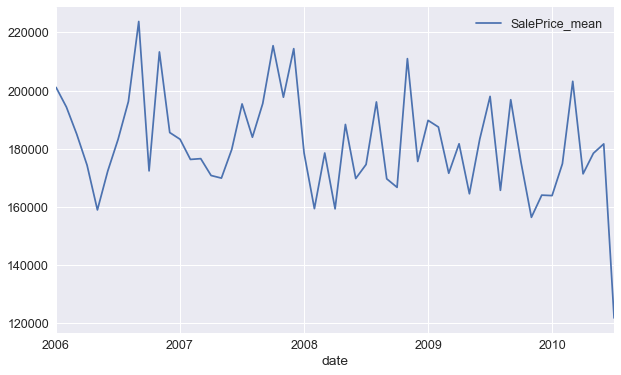

In [87]:
plt.figure(figsize = (50,50))
train_time.plot(x='date', y='SalePrice_mean', figsize=(10, 6))

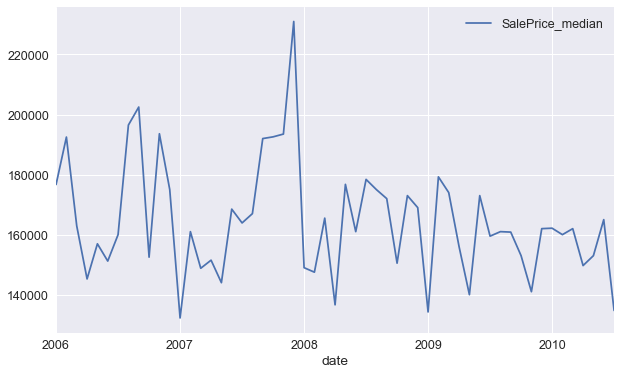

In [88]:
train_time.plot(x='date', y='SalePrice_median', figsize=(10, 6))

In [89]:
train_time['Qtr'] = pd.PeriodIndex(pd.to_datetime(train_time.date), freq='Q')

In [90]:
train_time_qtr = train_time.groupby('Qtr')['SalePrice_median'].agg(['median']).reset_index()

In [97]:
train_time_qtr['mean'] = train_time.groupby('Qtr')['SalePrice_median'].agg(['mean']).reset_index()['mean']

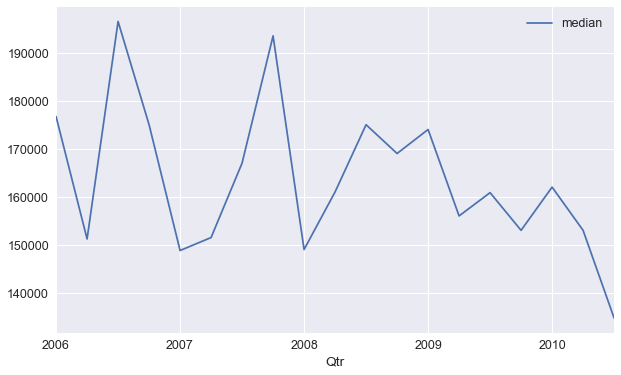

In [94]:
train_time_qtr.plot(x='Qtr', y='median', figsize=(10, 6))

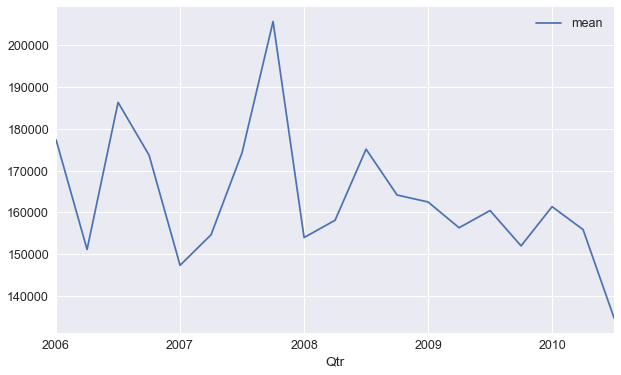

In [99]:
train_time_qtr.plot(x='Qtr', y='mean', figsize=(10, 6))